## Convolution Effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc

# Load the grayscale image
image = misc.ascent()

<ipython-input-1-629d1d11a2b4>:6: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image = misc.ascent()


In [2]:
# Laplacian of Gaussian (LoG) filter
"""
It is used to enhance edges and identify regions of rapid intensity changes in an image.
When convolving this filter with an image, it computes the second derivative of the image
intensity with respect to spatial coordinates, emphasizing regions of high-frequency changes (such as edges)
while suppressing low-frequency components.
"""
filter_LoG = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

# Horizontal edge detection
filter_h = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
])

# Verticall edge detection
filter_v = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

filter = filter_v
weight = 1 # as all filters add up to either 0 or 1

## Filter Weight
When working with filters in image processing or convolutional neural networks, it is generally desirable to have filter coefficients that add up to either 0 or 1. This normalization ensures that the filter does not introduce any bias or scaling issues to the image during convolution.

If the filter coefficients do not add up to 0 or 1, it means that the filter has a non-uniform scaling effect on the image pixels. This can lead to unintended consequences such as amplifying or attenuating certain features or introducing artifacts in the processed image.

To address this issue, it is common practice to normalize the filter coefficients by dividing them by their sum. This normalization ensures that the total contribution of the filter remains consistent and does not introduce any scaling bias.

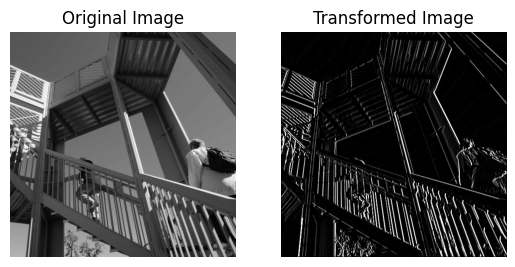

In [3]:
# Apply the filter to the image
image_transformed = np.zeros_like(image)

size_x, size_y = image.shape
for x in range(1, size_x - 1):
    for y in range(1, size_y - 1):
        convolution = 0.0
        convolution = convolution + (image[x-1, y-1] * filter[0][0])
        convolution = convolution + (image[x-1, y] * filter[0][1])
        convolution = convolution + (image[x-1, y+1] * filter[0][2])
        convolution = convolution + (image[x, y-1] * filter[1][0])
        convolution = convolution + (image[x, y] * filter[1][1])
        convolution = convolution + (image[x, y+1] * filter[1][2])
        convolution = convolution + (image[x+1, y-1] * filter[2][0])
        convolution = convolution + (image[x+1, y] * filter[2][1])
        convolution = convolution + (image[x+1, y+1] * filter[2][2])

        # Multiply by weight
        convolution = convolution * weight

        # Check the boundaries of the pixel values
        if convolution < 0:
            convolution = 0
        if convolution > 255:
            convolution = 255

        # Load into the transformed image
        image_transformed[x, y] = convolution

# Display the original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()

## Max Pooling Effect

<ipython-input-4-47bace6729b7>:5: DeprecationWarning: scipy.misc.ascent has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.ascent instead.
  image_transformed = misc.ascent()


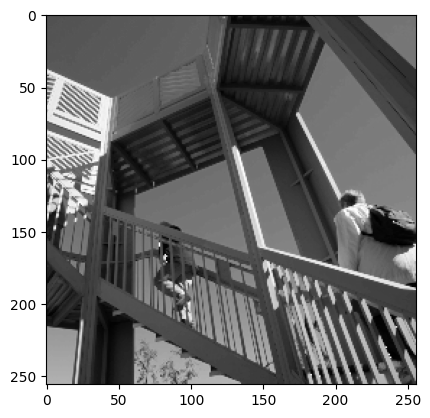

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_transformed = misc.ascent()

# Get the size of the image
size_x, size_y = image_transformed.shape

# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create a blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
    for y in range(0, size_y, 2):
        # Store all the pixel values in the (2,2) pool
        pixels = []
        pixels.append(image_transformed[x, y])
        pixels.append(image_transformed[x+1, y])
        pixels.append(image_transformed[x, y+1])
        pixels.append(image_transformed[x+1, y+1])

        # Get only the largest value and assign it to the reduced image
        newImage[int(x/2), int(y/2)] = max(pixels)

# Plot the image
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()